In [1]:
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_csv("train.csv")

In [4]:
train_df.shape

(1804874, 45)

(array([1266229.,  160959.,  170695.,    5515.,   57142.,   72099.,
          26784.,   14620.,   21605.,    9226.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

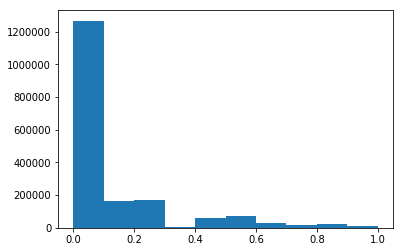

In [5]:
plt.hist(train_df["target"])

In [6]:
list(train_df.columns)

['id',
 'target',
 'comment_text',
 'severe_toxicity',
 'obscene',
 'identity_attack',
 'insult',
 'threat',
 'asian',
 'atheist',
 'bisexual',
 'black',
 'buddhist',
 'christian',
 'female',
 'heterosexual',
 'hindu',
 'homosexual_gay_or_lesbian',
 'intellectual_or_learning_disability',
 'jewish',
 'latino',
 'male',
 'muslim',
 'other_disability',
 'other_gender',
 'other_race_or_ethnicity',
 'other_religion',
 'other_sexual_orientation',
 'physical_disability',
 'psychiatric_or_mental_illness',
 'transgender',
 'white',
 'created_date',
 'publication_id',
 'parent_id',
 'article_id',
 'rating',
 'funny',
 'wow',
 'sad',
 'likes',
 'disagree',
 'sexual_explicit',
 'identity_annotator_count',
 'toxicity_annotator_count']

In [7]:
main_fields = ["id", "target", "comment_text", "created_date", "publication_id", "parent_id", "article_id", "rating", "likes", "identity_annotator_count", "toxicity_annotator_count", "funny", "wow", "sad", "disagree"]

In [8]:
fields_to_research = ["severe_toxicity", "obscene", "identity_attack", "insult", "threat", "sexual_explicit"]

In [9]:
groups = [c for c in train_df.columns if c not in main_fields + fields_to_research]

# How many toxic comments in each group

In [10]:
toxic_amounts_df = train_df[train_df["target"] > 0.5][groups].astype(bool).sum(axis=0).sort_values(ascending=False)
toxic_amounts_df

male                                   82123
female                                 81054
white                                  79189
black                                  77584
muslim                                 77570
christian                              77257
homosexual_gay_or_lesbian              76451
psychiatric_or_mental_illness          75641
other_race_or_ethnicity                75606
other_religion                         75127
jewish                                 74867
asian                                  74658
latino                                 74586
transgender                            74524
intellectual_or_learning_disability    74515
other_sexual_orientation               74386
heterosexual                           74303
bisexual                               74166
physical_disability                    74156
other_disability                       74150
other_gender                           74116
atheist                                74023
hindu     

In [11]:
non_toxic_amounts_df = train_df[train_df["target"] < 0.5][groups].astype(bool).sum(axis=0).sort_values(ascending=False)
non_toxic_amounts_df

male                                   1369827
female                                 1364709
christian                              1357360
white                                  1323580
muslim                                 1322452
other_race_or_ethnicity                1317614
other_religion                         1316155
black                                  1315542
homosexual_gay_or_lesbian              1312904
asian                                  1311191
jewish                                 1310735
psychiatric_or_mental_illness          1309698
latino                                 1307258
transgender                            1306483
other_sexual_orientation               1305142
other_disability                       1304533
bisexual                               1304245
physical_disability                    1304224
heterosexual                           1304180
other_gender                           1303741
atheist                                1303419
intellectual_

In [12]:
(toxic_amounts_df / (toxic_amounts_df + non_toxic_amounts_df)).sort_values(ascending=False)

male                                   0.056560
white                                  0.056452
female                                 0.056063
black                                  0.055691
muslim                                 0.055406
homosexual_gay_or_lesbian              0.055026
psychiatric_or_mental_illness          0.054601
other_race_or_ethnicity                0.054267
intellectual_or_learning_disability    0.054083
jewish                                 0.054032
other_religion                         0.053998
latino                                 0.053976
transgender                            0.053964
other_sexual_orientation               0.053921
heterosexual                           0.053902
asian                                  0.053872
christian                              0.053852
bisexual                               0.053805
physical_disability                    0.053799
other_gender                           0.053791
other_disability                       0

All groups are very imbalanced

# The average nonzero toxicity for each group

In [13]:
import numpy as np

In [14]:
mean_toxicity = []
for group in groups:
    values = train_df[train_df[group] > 0]["target"]
    mean_toxicity.append([group, values.mean(), values[values > 0.5].mean()])

In [15]:
mean_toxicity_df = pd.DataFrame(mean_toxicity, columns=["group", "mean", "toxic_mean"]).set_index("group")

In [16]:
mean_toxicity_df.sort_values("mean", ascending=False)

,mean,toxic_mean
group,,
black,0.292384,0.685588
intellectual_or_learning_disability,0.286834,0.732434
white,0.284128,0.681911
homosexual_gay_or_lesbian,0.276738,0.686479
muslim,0.247435,0.693232
heterosexual,0.241139,0.684141
psychiatric_or_mental_illness,0.236047,0.703083
other_sexual_orientation,0.214015,0.686315
transgender,0.213658,0.685143


In [17]:
import seaborn as sns

# The average degree of confidence for each group

In [18]:
train_df[train_df > 0][groups].mean(axis=0).sort_values(ascending=False)

white                                  0.770412
muslim                                 0.751878
black                                  0.712237
female                                 0.701901
homosexual_gay_or_lesbian              0.677835
jewish                                 0.663610
christian                              0.629008
atheist                                0.576320
male                                   0.549174
psychiatric_or_mental_illness          0.459000
transgender                            0.445092
asian                                  0.441621
buddhist                               0.418327
heterosexual                           0.379792
hindu                                  0.379208
latino                                 0.357852
bisexual                               0.229243
other_race_or_ethnicity                0.177099
physical_disability                    0.170245
intellectual_or_learning_disability    0.166474
other_religion                         0

# Number of annotators

In [19]:
from sklearn.preprocessing import quantile_transform, QuantileTransformer

In [20]:
train_df["toxicity_annotator_count_normed"] = train_df["toxicity_annotator_count"].round(-1)

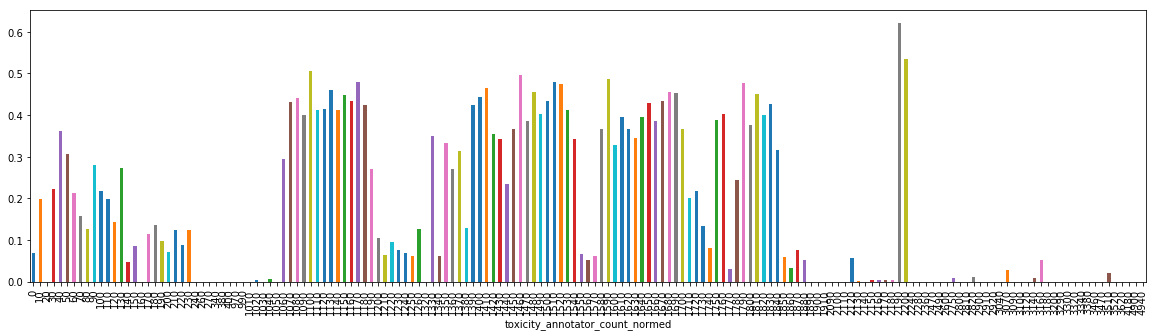

In [21]:
train_df.groupby("toxicity_annotator_count_normed")["target"].std().plot(kind='bar', figsize=(20, 5))

The confidence in the toxicity is high for big amount of annotators

In [22]:
train_df["identity_annotator_count_normed"] = train_df["identity_annotator_count"].round(-1)

In [23]:
train_df["max_identity"] = train_df[groups].max(axis=1)

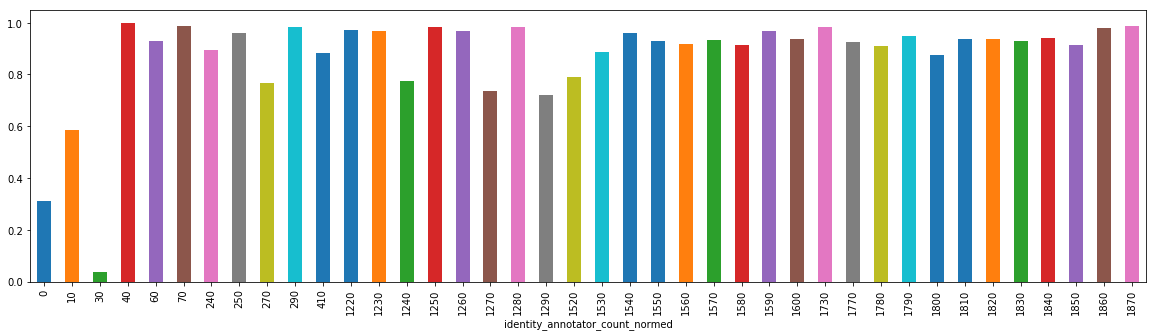

In [24]:
train_df.groupby("identity_annotator_count_normed")["max_identity"].mean().plot(kind='bar', figsize=(20, 5))

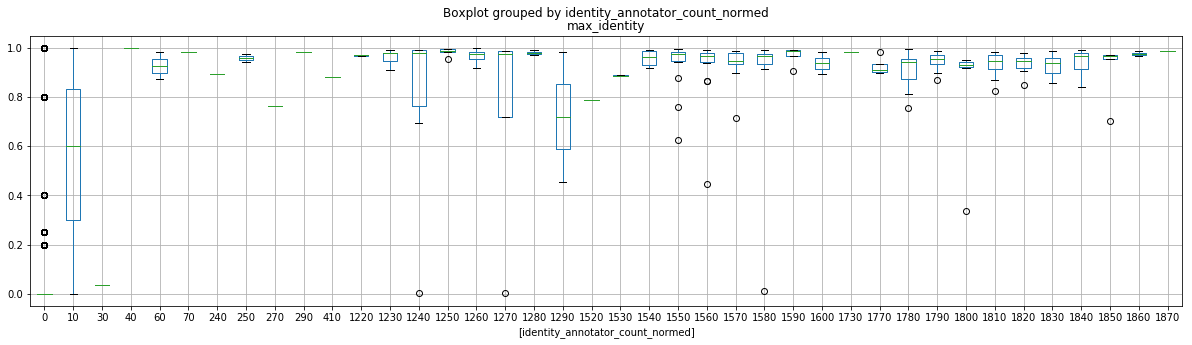

In [25]:
train_df[["max_identity", "identity_annotator_count_normed"]].fillna(0).boxplot(by='identity_annotator_count_normed', figsize=(20, 5))

The confidence in identity is not so high for the small amount of annotators

# Toxic reaction

In [26]:
not_toxic = train_df["target"] < 0.4

In [27]:
toxic = (train_df["target"] >= 0.4) & (train_df["target"] < 0.7)

In [28]:
very_toxic = (train_df["target"] >= 0.7)

In [29]:
rating_size = train_df["rating"].value_counts()

In [30]:
train_df.groupby("rating")["target"].mean()

rating
approved    0.091976
rejected    0.257878
Name: target, dtype: float64

# How many comments from different categories of toxicity were approved and rejected 

In [31]:
train_df[not_toxic].groupby("rating").size() / train_df[not_toxic].shape[0]

rating
approved    0.949404
rejected    0.050596
dtype: float64

In [32]:
train_df[toxic].groupby("rating").size() / train_df[toxic].shape[0]

rating
approved    0.839575
rejected    0.160425
dtype: float64

In [33]:
train_df[very_toxic].groupby("rating").size() / train_df[very_toxic].shape[0]

rating
approved    0.725926
rejected    0.274074
dtype: float64

# Reaction

In [34]:
reaction = ["likes", "sad", "wow", "funny", "disagree"]

In [35]:
train_df[not_toxic][reaction].mean(axis=0)

likes       2.425302
sad         0.107101
wow         0.043332
funny       0.281087
disagree    0.572950
dtype: float64

In [36]:
train_df[toxic][reaction].mean(axis=0)

likes       2.719654
sad         0.130369
wow         0.053312
funny       0.257111
disagree    0.714157
dtype: float64

likes


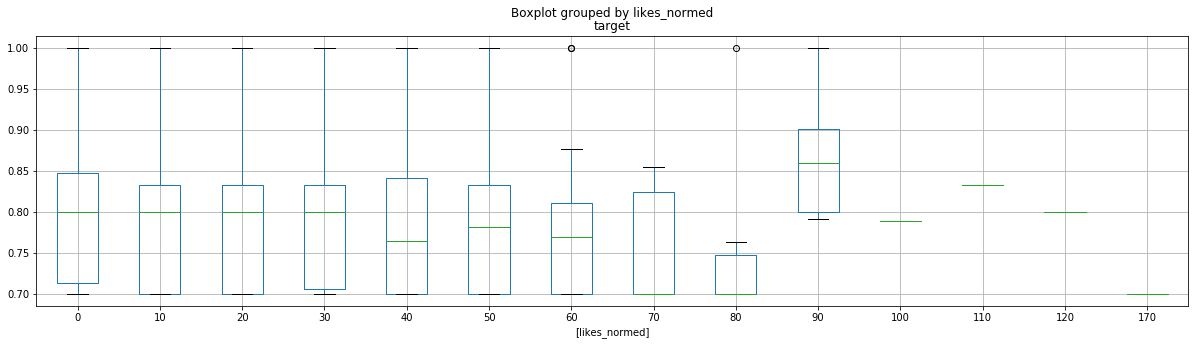

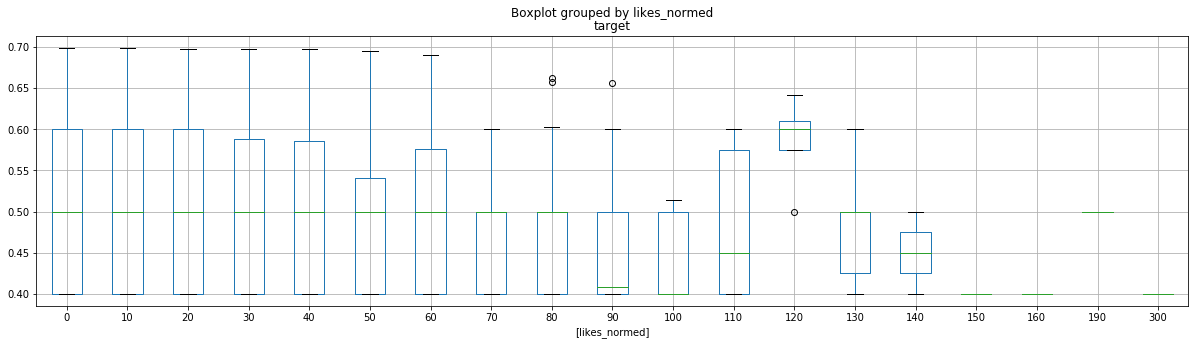

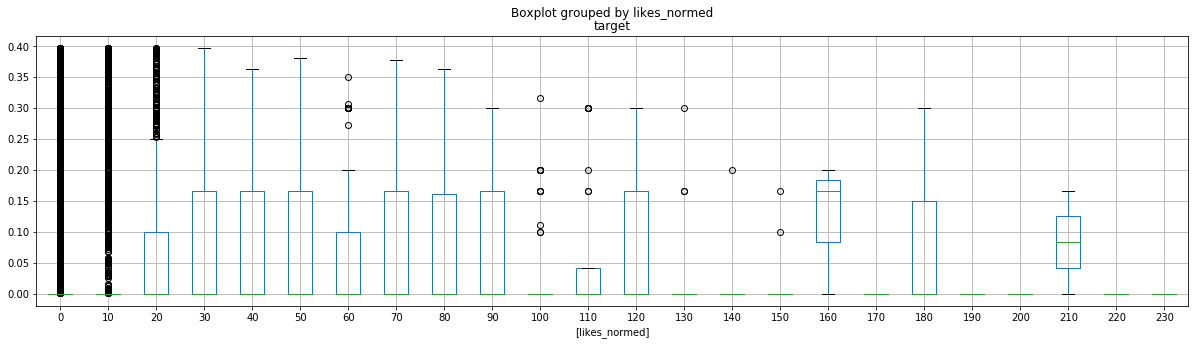

sad


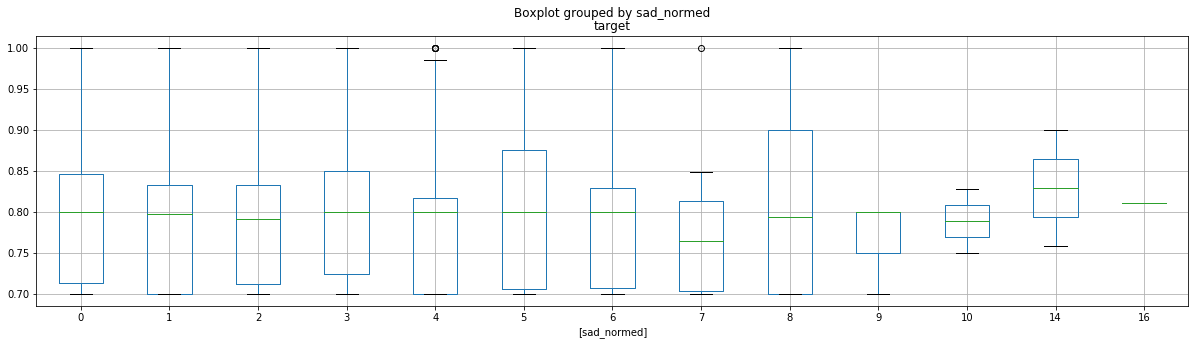

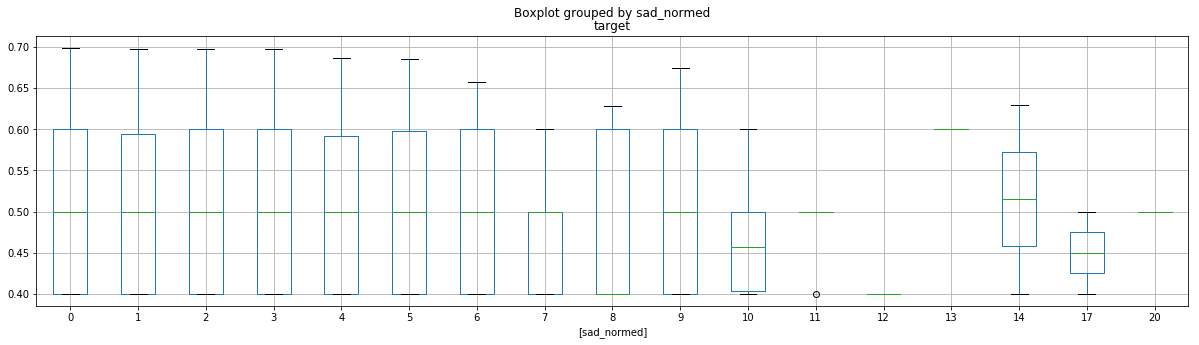

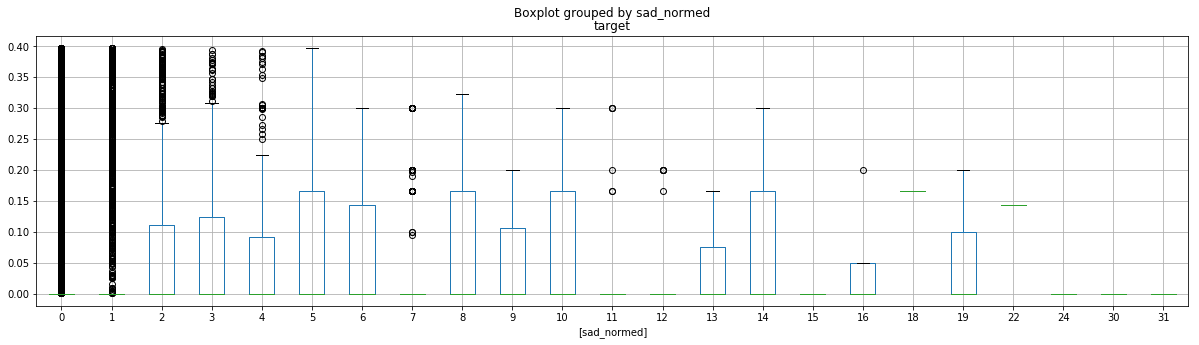

wow


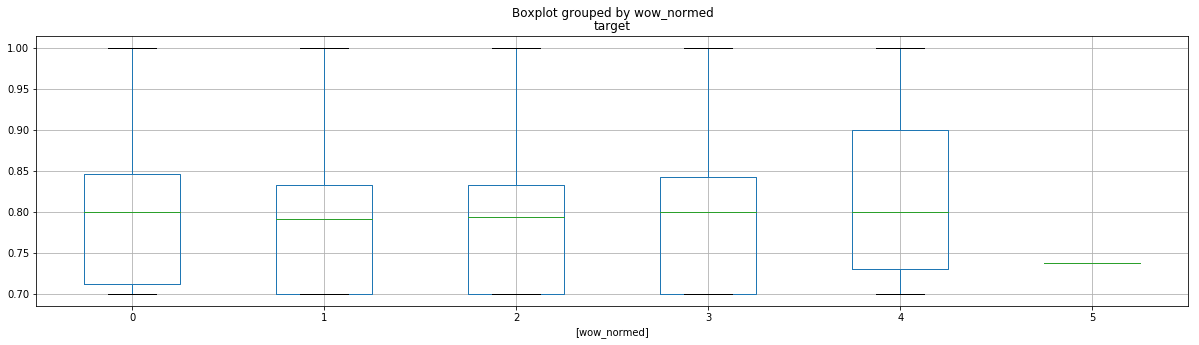

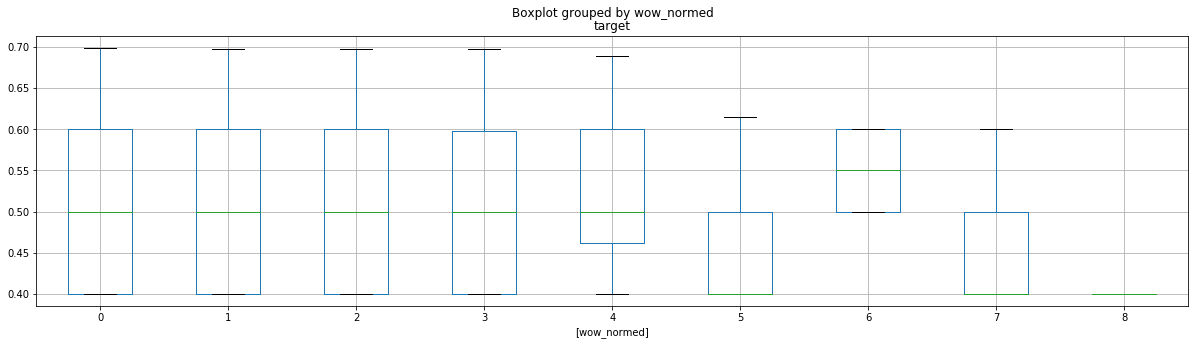

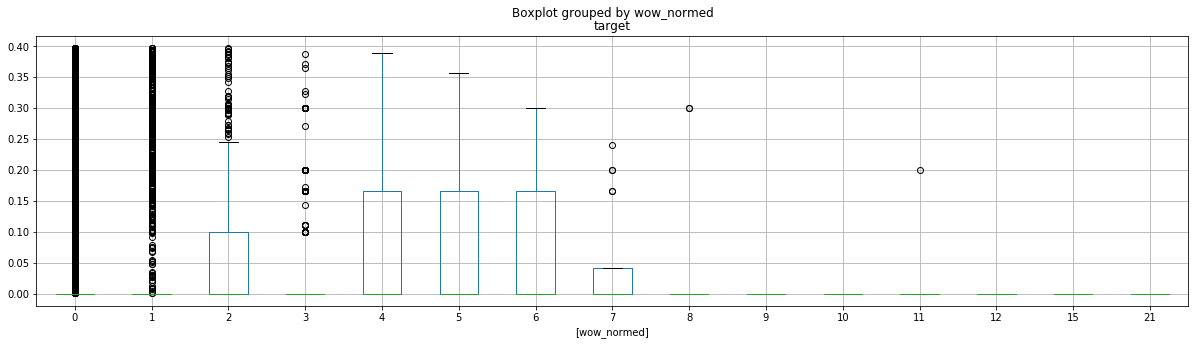

funny


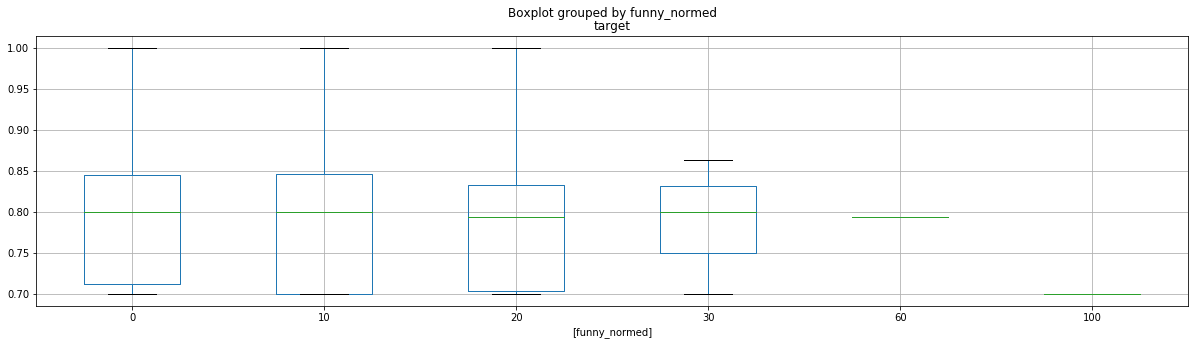

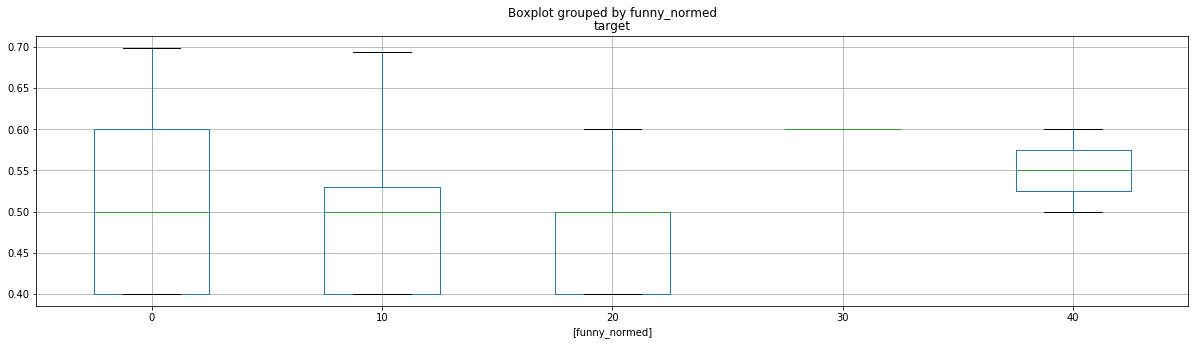

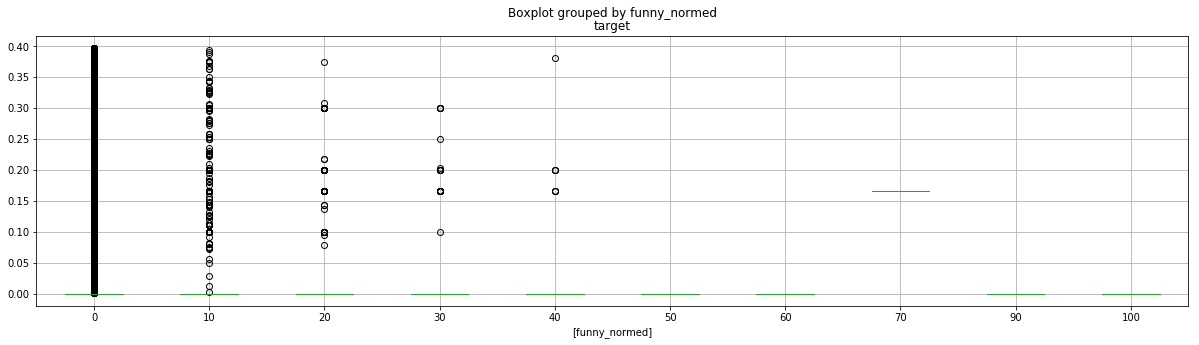

disagree


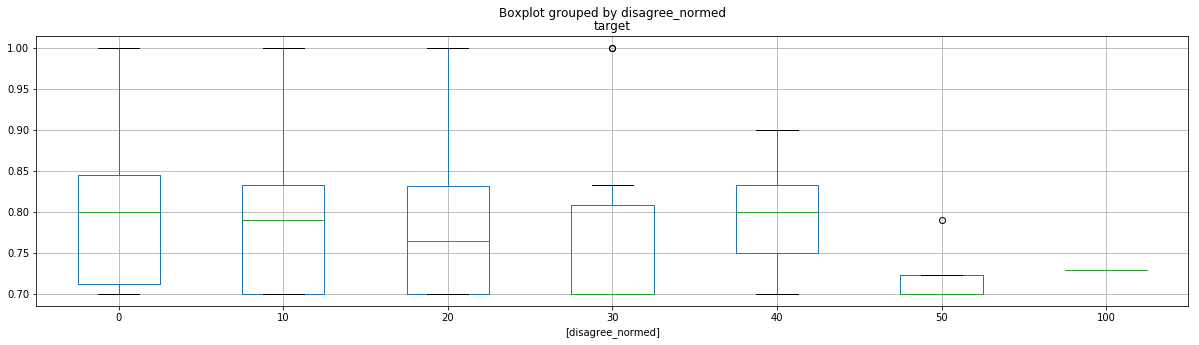

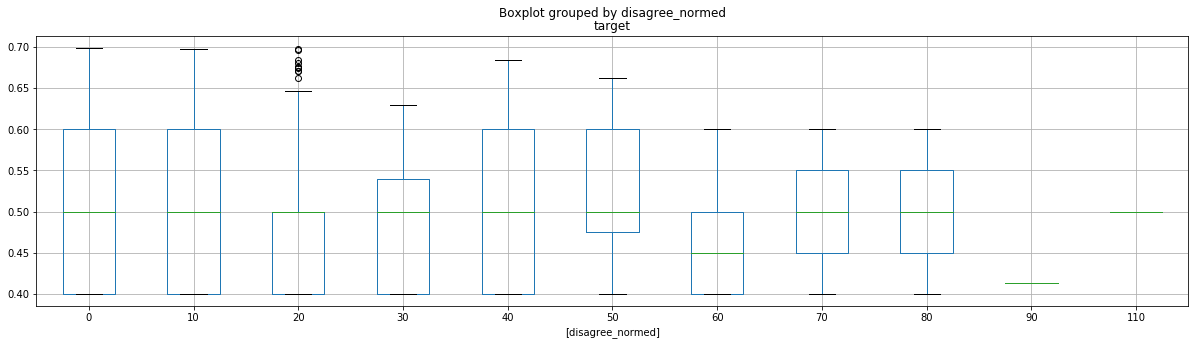

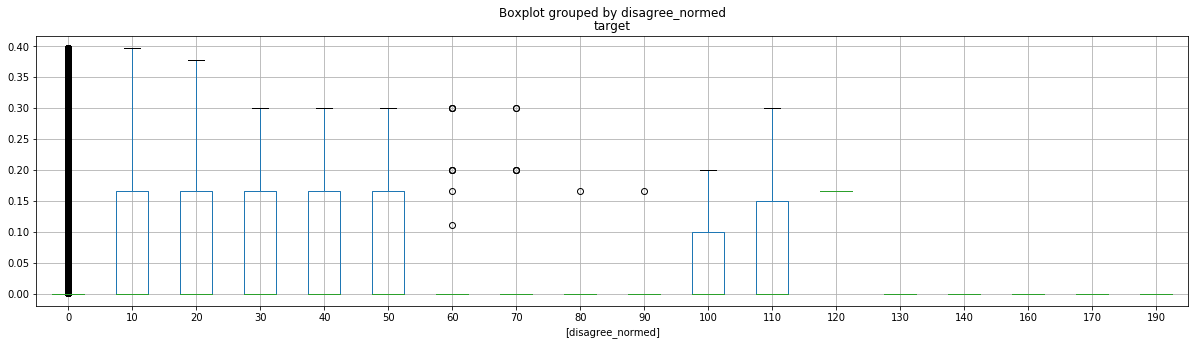

In [37]:
for field in reaction:
    print(field)
    field_normed = "{}_normed".format(field)
    start_round = 0
    while train_df[field].round(start_round).unique().shape[0] > 50:
        start_round -= 1
    train_df[field_normed] = train_df[field].round(start_round)
    train_df[very_toxic][[field_normed, "target"]].boxplot(by=field_normed, figsize=(20, 5))
    train_df[toxic][[field_normed, "target"]].boxplot(by=field_normed, figsize=(20, 5))
    train_df[not_toxic][[field_normed, "target"]].boxplot(by=field_normed, figsize=(20, 5))
    plt.show()

# Most popular words

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
vectorizer = CountVectorizer(max_features=100000, min_df=2)

In [66]:
vectorizer.fit(train_df["comment_text"].str.lower())

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=100000, min_df=2,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [67]:
len(vectorizer.vocabulary_)

100000

In [68]:
word_counts = vectorizer.transform(train_df["comment_text"].str.lower())

In [69]:
words = [word for word, _ in sorted(vectorizer.vocabulary_.items(), key=lambda x: x[1])]

In [70]:
group = groups[0]

### Toxic comments for each group

In [116]:
very_toxic

Int64Index([  51397,   57332,   65325,   93978,  105517,  110381,  117888,
             120038,  120690,  132701,
            ...
            1704302, 1709280, 1714517, 1720769, 1733811, 1757536, 1760220,
            1760816, 1768907, 1789795],
           dtype='int64', length=179)

In [121]:
all_toxic_words = []

In [123]:
for group in groups:
    very_toxic = (train_df[group] > 0) & (train_df["target"] >= 0.8)
    not_toxic = (train_df[group] > 0) & (train_df["target"] < 0.4)
    all_toxic = (train_df["target"] >= 0.8)
    
    word_counts_toxic = word_counts[train_df[very_toxic].sample(1000, replace=True).index, :]
    word_counts_not_toxic = word_counts[train_df[not_toxic].sample(1000, replace=True).index, :]
    word_counts_all_toxic = word_counts[train_df[all_toxic].sample(1000, replace=True).index, :]
    
    word_counts_toxic_sum = word_counts_toxic.sum(axis=0)
    word_counts_not_toxic_sum = word_counts_not_toxic.sum(axis=0)
    word_counts_all_toxic_sum = word_counts_all_toxic.sum(axis=0)
    
    toxic_frequencies = {words[i]: word_counts_toxic_sum[0, i] for i in range(len(words))}
    not_toxic_frequencies = {words[i]: word_counts_not_toxic_sum[0, i] for i in range(len(words))}
    all_toxic_frequencies = {words[i]: word_counts_all_toxic_sum[0, i] for i in range(len(words))}
    
    toxic_frequencies_df = pd.DataFrame(list(toxic_frequencies.items()), columns=["word", "toxic_count"]).set_index("word")
    not_toxic_frequencies_df = pd.DataFrame(list(not_toxic_frequencies.items()), columns=["word", "not_toxic_count"]).set_index("word")
    all_toxic_frequencies_df = pd.DataFrame(list(all_toxic_frequencies.items()), columns=["word", "all_toxic_count"]).set_index("word")
    
    frequencies_df = toxic_frequencies_df.merge(not_toxic_frequencies_df, left_index=True, right_index=True)
    frequencies_df = frequencies_df.merge(all_toxic_frequencies_df, left_index=True, right_index=True)
    
    toxic_words = frequencies_df[
        (frequencies_df["toxic_count"] + frequencies_df["not_toxic_count"] > 10) & 
        (frequencies_df["toxic_count"] / frequencies_df["not_toxic_count"] > 2)  & 
        (frequencies_df["toxic_count"] / frequencies_df["all_toxic_count"] > 2)
    ].sort_values("toxic_count", ascending=False).index[0:20]
    
    print(group)
    print(toxic_words)
    print()
    
    all_toxic_words.append(toxic_words)

asian
Index(['black', 'asians', 'racist', 'blacks', 'muslims', 'little', 'ever',
       'obama', 'name', 'hate', 'whites', 'reality', 'rest', 'anti', 'folks',
       'corrupt', 'bunch', 'lives', 'indians', 'facts', 'africa', 'needs',
       'looking', 'truth', 'policy', 'everything', 'violence', 'killed',
       'corruption', 'aren', 'ethnic', 'decades', 'everybody', 'designed',
       'gets', 'sorry', 'play', 'guys', 'knows', 'global', 'write', 'blame',
       'calling', 'interests', 'eyes', 'yourself', 'cars', 'losers', 'certain',
       'destroying'],
      dtype='object', name='word')

atheist
Index(['christians', 'fear', 'facebook', 'hate', 'jews', 'really', 'friends',
       'country', 'islam', 'kelley', 'holy', 'before', 'saying', 'true', 'yes',
       'armies', 'anti', 'new', 'll', 'media', 'ever', 'shit', 'russians',
       'perhaps', 'lived', 'site', 'trash', 'nytimes', 'please', 'use',
       'bangladesh', 'islamists', 'listed', 'become', 'unbelievers', 'suras',
       'show

muslim
Index(['kill', 'gay', 'black', 'killing', 'gays', 'innocent', 'needs', 'evil',
       'murder', 'civilians', 'infidels', 'supremacist', 'cult', 'hundreds',
       'jihadists', 'losers', 'sore', 'darn', 'atheists', 'whites', 'alive',
       'convert', 'dogs', 'mueller', 'holy', 'murdering', 'supposed', 'angry',
       'tolerate', 'destroy', 'target', 'seriously', 'orlando', 'opposing',
       'traitor', 'hypocrisy', 'hating', 'intolerant', 'join', 'blaming',
       'unbelievers', 'sects', 'dark', 'homosexuals', 'washington', 'brown',
       'killings', 'mutilation', 'targeted', 'wake'],
      dtype='object', name='word')

other_disability
Index(['white', 'disabled', 'black', 'cancer', 'folks', 'sick', 'world',
       'ignorant', 'pussys', 'hate', 'violence', 'muslim', 'truth', 'islam',
       'stop', 'lie', 'gay', 'deplorable', 'western', 'half', 'rump', 'matter',
       'political', 'behavior', 'alcohol', 'trudeau', 'cases', 'sex',
       'ignorance', 'social', 'views', 'accused

In [124]:
all_toxic_words = [word for words in all_toxic_words for word in words]

In [127]:
all_toxic_words = list(set(all_toxic_words))

# Simple classifier to predict toxicity. Classes with problems

Features:
- Reactions (ratings, sad, wow, funny, disagree, likes)
- Toxic words

Classify only comments with any subgroup. 

In [198]:
classified_df = train_df[["comment_text", "likes", "rating", "sad", "wow", "funny", "disagree", "target"]][(train_df[groups].sum(axis=1) > 0) & ((train_df["target"] < 0.4) | (train_df["target"] >= 0.8))].copy()

KeyboardInterrupt: 

In [ ]:
classified_df["toxic"] = classified_df["target"] > 0.5

In [ ]:
words_inv = {w: i for i, w in enumerate(words)}

In [ ]:
word_counts

In [161]:
toxic_word_counts = word_counts.tocsc()[:, [words_inv[word] for word in all_toxic_words]]

In [162]:
toxic_word_counts = toxic_word_counts.tocsr()

In [163]:
toxic_word_counts = toxic_word_counts[classified_df.index, :]

In [166]:
from sklearn.decomposition import TruncatedSVD

In [167]:
pca = TruncatedSVD(n_components=10)

In [168]:
toxic_word_counts_pca = pca.fit_transform(toxic_word_counts)

In [169]:
toxic_word_counts_pca.shape

(226234, 10)

In [173]:
toxic_word_counts_pca_df = pd.DataFrame(toxic_word_counts_pca, index=toxic_word_counts_pca_df.index)

In [175]:
classified_df = classified_df.merge(toxic_word_counts_pca_df, left_index=True, right_index=True)

In [185]:
classified_df["rating"] = classified_df["rating"] == "approved"

In [191]:
X = classified_df.drop(columns=["target", "toxic", "comment_text"])

In [192]:
y = classified_df["toxic"]

In [193]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [194]:
grid = {
    "n_estimators": range(10, 100, 10)
}
model = GradientBoostingClassifier(verbose=True)
search = GridSearchCV(model, grid, scoring="roc_auc", cv=3)

In [195]:
search.fit(X, y)

      Iter       Train Loss   Remaining Time 
         1           0.7166            7.38s
         2           0.7112            3.50s
         3           0.7071            2.37s
         4           0.7038            1.62s
         5           0.7015            1.10s
         6           0.6996            0.74s
         7           0.6979            0.48s
         8           0.6966            0.30s
         9           0.6951            0.14s
        10           0.6941            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.7151            0.96s
         2           0.7085            0.50s
         3           0.7036            0.32s
         4           0.7000            0.56s
         5           0.6972            0.39s
         6           0.6951            0.36s
         7           0.6933            0.25s
         8           0.6919            0.19s
         9           0.6907            0.08s
        10           0.6893            0.00s
      It

         8           0.6926            0.99s
         9           0.6912            0.92s
        10           0.6901            0.86s
        20           0.6836            0.66s
        30           0.6793            0.39s
        40           0.6758            0.20s
        50           0.6715            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.7166            0.79s
         2           0.7112            0.81s
         3           0.7071            0.84s
         4           0.7038            2.98s
         5           0.7015            4.27s
         6           0.6996            3.62s
         7           0.6979            3.16s
         8           0.6966            2.80s
         9           0.6951            2.53s
        10           0.6941            3.11s
        20           0.6884            2.15s
        30           0.6834            1.21s
        40           0.6790            0.67s
        50           0.6755            0.30s
        6

        20           0.6828            2.80s
        30           0.6779            2.08s
        40           0.6733            1.48s
        50           0.6694            1.06s
        60           0.6653            0.74s
        70           0.6621            0.46s
        80           0.6579            0.22s
        90           0.6542            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.7155            1.15s
         2           0.7093            1.11s
         3           0.7046            1.19s
         4           0.7011            1.16s
         5           0.6982            1.17s
         6           0.6961            1.16s
         7           0.6943            1.14s
         8           0.6926            1.13s
         9           0.6912            3.49s
        10           0.6901            3.37s
        20           0.6836            2.74s
        30           0.6793            2.33s
        40           0.6758            1.62s
        5

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...   subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=True, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(10, 100, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [196]:
search.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=30,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=True, warm_start=False)

In [197]:
search.best_score_

0.5957209202312268

- Draw two background distribution
- Draw two distribution for each subgroup - hist with all predictions for real classes

- What features will we use? What features can we interpret?
- What normalizations will we implement for the output
- What group thresholds should we expect
- What metric effects should we expect